# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


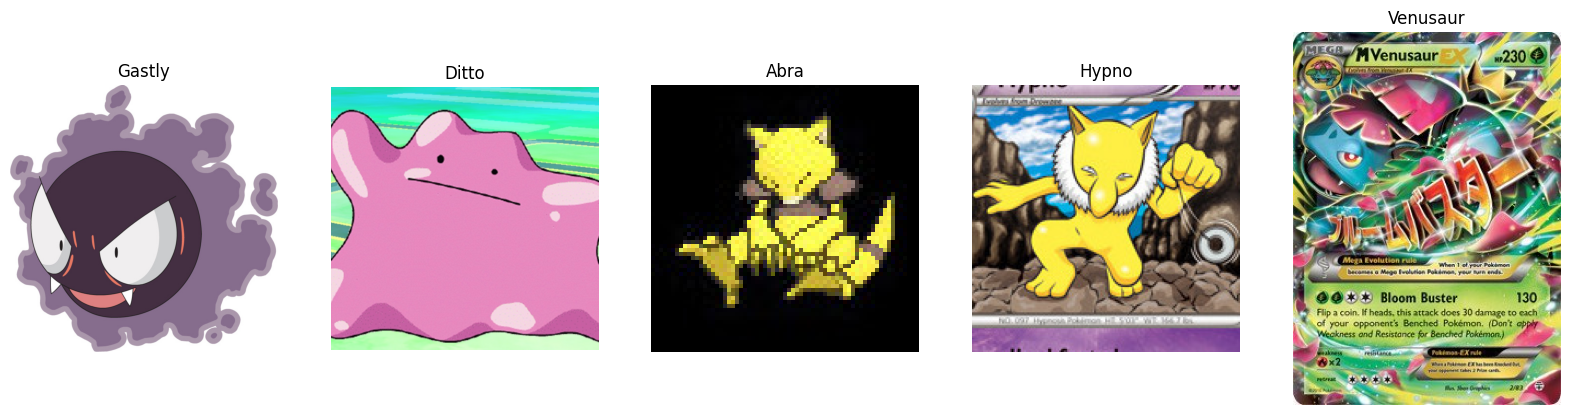

In [41]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#print whole directory


training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [42]:
from PIL import Image
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)



#loop through creating dataset that contains [label, path_to_image]
dataset = []
for i in os.listdir(training_directory):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = resize_image(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    dataset.append([random_pokemon, img])
    
    
# place training data into x and labels into y
labels = [x[0] for x in dataset]
images = [x[1] for x in dataset]
labels = [poke_dict[item] for item in labels]

images = np.array(images)
labels = np.array(labels)


images = images / 255.0


# Flatten the image arrays for the MLP input
images = images.reshape(images.shape[0], -1)
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0],64,64,3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)





In [43]:
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import BatchNormalization
#do not do tensorflow.keras, import keras manually when you get this error
from keras import datasets, layers, models


model = models.Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 128)      

In [44]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, 
                    batch_size= 4,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/100
30/30 [==============================] - ETA: 0s - loss: 17.0009 - accuracy: 0.0333WARNING:tensorflow:5 out of the last 381 calls to <function Model.make_test_function.<locals>.test_function at 0x2d40cd800> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


30/30 [==============================] - 3s 77ms/step - loss: 17.0009 - accuracy: 0.0333 - val_loss: 5.0290 - val_accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 4s 150ms/step - loss: 4.3690 - accuracy: 0.1083 - val_loss: 5.0710 - val_accuracy: 0.0333
Epoch 3/100
30/30 [==============================] - 4s 144ms/step - loss: 3.7152 - accuracy: 0.2417 - val_loss: 5.7002 - val_accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 4s 147ms/step - loss: 2.7339 - accuracy: 0.4250 - val_loss: 6.3378 - val_accuracy: 0.1000
Epoch 5/100
30/30 [==============================] - 5s 155ms/step - loss: 1.4820 - accuracy: 0.6917 - val_loss: 7.8652 - val_accuracy: 0.1000
Epoch 6/100
30/30 [==============================] - 4s 147ms/step - loss: 0.7231 - accuracy: 0.8333 - val_loss: 8.4128 - val_accuracy: 0.0667
Epoch 7/100
30/30 [==============================] - 5s 152ms/step - loss: 0.2572 - accuracy: 0.9583 - val_loss: 9.5014 - val_accuracy: 0.0667
Epo

1/1 [==============================] - 0s 105ms/step


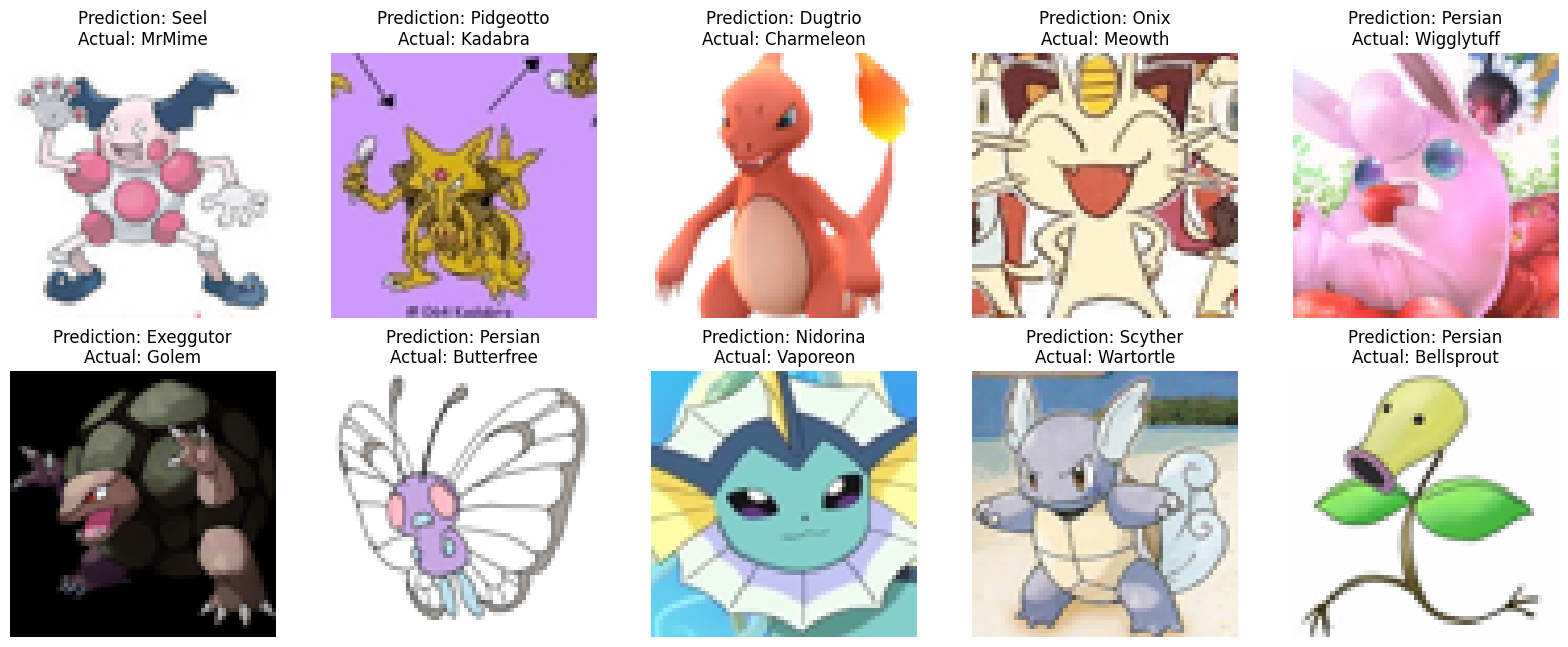

Accuracy for class: Zapdos       is 0.0 %
Accuracy for class: Kadabra      is 0.0 %
Accuracy for class: Alolan Sandslash is 0.0 %
Accuracy for class: Omanyte      is 100.0 %
Accuracy for class: Shellder     is 0.0 %
Accuracy for class: Bellsprout   is 0.0 %
Accuracy for class: Eevee        is 0.0 %
Accuracy for class: Jolteon      is 0.0 %
Accuracy for class: Hypno        is 0.0 %
Accuracy for class: Seel         is 0.0 %
Accuracy for class: Zubat        is 0.0 %
Accuracy for class: Graveler     is 0.0 %
Accuracy for class: Magneton     is 0.0 %
Accuracy for class: Abra         is 0.0 %
Accuracy for class: Kingler      is 0.0 %
Accuracy for class: Alakazam     is 0.0 %
Accuracy for class: Clefable     is 0.0 %
Accuracy for class: Gyarados     is 0.0 %
Accuracy for class: Poliwag      is 0.0 %
Accuracy for class: Rapidash     is 0.0 %
Accuracy for class: Machamp      is 0.0 %
Accuracy for class: Pinsir       is 0.0 %
Accuracy for class: Muk          is 0.0 %
Accuracy for class: Seaking 

In [52]:
import sys

def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 plt.savefig(filename + '_plot.png')
 plt.close()


# Define class names
class_names = poke_list

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {class_names[predicted_labels[i]]}\nActual: {class_names[y_test[i]]}")
    
    plt.axis("off")

plt.show()



# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = class_names[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

summarize_diagnostics(history)